Advanced Topics on Sinkhorn Algorithm
=====================================
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

This numerical tour explore several extensions of the basic Sinkhorn
method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Log-domain Sinkhorn 
--------------------
For simplicity, we consider uniform distributions on point clouds, so
that the associated histograms are $ (a,b) \in \RR^n \times \RR^m$
being constant $1/n$ and $1/m$.

In [2]:
n = 400 # multiple of 5
m = 400

a = np.ones((n,1))/n
b = np.ones((1,m))/m

Point clouds $x$ and $y$.

In [3]:
theta = np.random.uniform(0, 2*np.pi, n)
r = np.random.uniform(0, .2 , n)
t = np.tile(np.array([[0,0], [1, 1], [-1, 1], [1, -1], [-1, -1]]), (n // 5, 1))
x = t.T + r*np.array([np.cos(theta), np.sin(theta)])

theta = np.random.uniform(0,2*np.pi, m)
r = np.random.uniform(.6, .8, m)
y = r*np.array([np.cos(theta), np.sin(theta)])

Display of the two clouds.

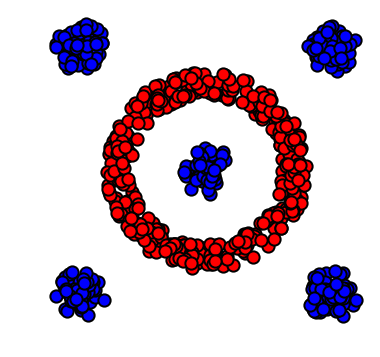

In [4]:
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=150, edgecolors="k", c=col, linewidths=2)
plt.figure(figsize=(6,6))
plotp(x, 'b')
plotp(y, 'r')
plt.axis("off");

Cost matrix $C_{i,j} = \norm{x_i-y_j}^2$.

In [5]:
def distmat(x,y):
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)
C = distmat(x,y)

Sinkhorn algorithm is originally implemented using matrix-vector
multipliciation, which is unstable for small epsilon.
Here we consider a log-domain implementation, which operates by
iteratively updating so-called Kantorovitch dual potentials $ (f,g) \in \RR^n \times \RR^m $.


The update are obtained by regularized c-transform, which reads
$$ f_i \leftarrow {\min}_\epsilon^b( C_{i,\cdot} - g ) $$
$$ g_j \leftarrow {\min}_\epsilon^a( C_{\cdot,j} - f ),  $$
where the regularized minimum operator reads
$$ {\min}_\epsilon^a(h) \eqdef -\epsilon \log \sum_i a_i e^{-h_i/\epsilon}. $$

In [29]:
def mina_u(H,epsilon): return -epsilon*np.log( np.sum(a * np.exp(-H/epsilon),0) )
def minb_u(H,epsilon): return -epsilon*np.log( np.sum(b * np.exp(-H/epsilon),1) )

The regularized min operator defined this way is non-stable, but it can
be stabilized using the celebrated log-sum-exp trick, wich relies on the
fact that for any constant $c \in \RR$, one has
$$ {\min}_\epsilon^a(h+c) = {\min}_\epsilon^a(h) + c,  $$
and stabilization is achieved using $c=\min(h)$.

In [30]:
def mina(H,epsilon): return mina_u(H-np.min(H,0),epsilon) + np.min(H,0);
def minb(H,epsilon): return minb_u(H-np.min(H,1)[:,None],epsilon) + np.min(H,1);

Value of $\epsilon$. 

In [8]:
epsilon = .001

__Exercise 1__

Implement Sinkhorn in log domain.

In [31]:
def Sinkhorn(C, epsilon, f, niter = 500, display_error = False):    
    Err = np.zeros(niter)
    for it in range(niter):
        g = mina(C - f[:,None], epsilon)
        f = minb(C - g[None,:], epsilon)
        if display_error:
            P = a * np.exp((f[:,None]+ g[None,:] - C)/epsilon) * b
            Err[it] = np.linalg.norm(np.sum(P,0)-b,1)
        
    P = a * np.exp((f[:,None]+ g[None,:] - C)/epsilon) * b
    if display_error: 
        return (P, Err)
    else:
        return P


In [115]:
P, Err =  Sinkhorn(C, epsilon, np.zeros(n), 3000, display_error = True)  

In [116]:
import cvxpy as cp
import timeit 

myplot = lambda x,y,ms,col: plt.scatter(x,y, s=ms*20, edgecolors="k", c=col, linewidths=2)

a = np.ones([n,1])/n
b = a

P_ = cp.Variable((n,m))
u = np.ones((m,1))
v = np.ones((n,1))
U = [0 <= P_, cp.matmul(P_,u)== a, cp.matmul(P_.T,v)== b]

start = timeit.default_timer()
objective = cp.Minimize( cp.sum(cp.multiply(P_,C)) )
prob = cp.Problem(objective, U)
result = prob.solve(solver = cp.ECOS)
stop = timeit.default_timer()
print('Execution time : ' + str(stop - start) + ' sec')


Execution time : 5.883179536000171 sec


In [118]:
start = timeit.default_timer()
P =  Sinkhorn(C, 0.005, np.zeros(n), 3000)
stop = timeit.default_timer()
print('Execution time : ' + str(stop - start) + ' sec')


Execution time : 27.594086586999765 sec


In [119]:
cost = np.sum(P*C)
cost_ = np.sum(P_.value * C)
print("Sinkhorn cost :", cost)
print("Exact cost : ", cost_)

Sinkhorn cost : 0.5638635289346552
Exact cost :  0.5604277388413711


__Exercise 2__

Study the impact of $\epsilon$ on the convergence rate of the algorithm.

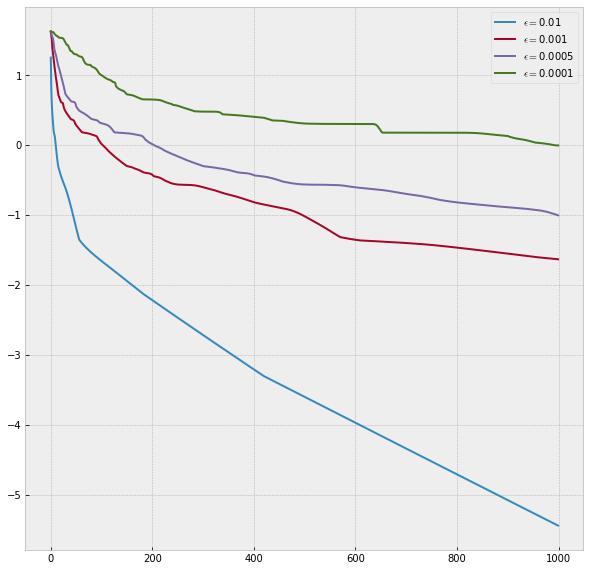

In [112]:
plt.style.use("bmh")
plt.figure(figsize = (10,10))
for epsilon in (.01, .001, .0005, .0001):
    (P,Err) =  Sinkhorn(C,epsilon,np.zeros(n),1000, display_error = True)  
    plt.plot(np.log10(Err), label='$\epsilon=$' + str(epsilon))
plt.legend();

Wasserstein Flow for Matching 
------------------------------
We aim at performing a "Lagrangian" gradient (also called Wasserstein flow) descent of Wasserstein
distance, in order to perform a non-parametric fitting. This corresponds
to minimizing the energy function
$$ \Ee(z) \eqdef W_\epsilon\pa{ \frac{1}{n}\sum_i \de_{z_i}, \frac{1}{m}\sum_i \de_{y_i} }. $$


Here we have denoted the Sinkhorn score as
$$ W_\epsilon(\al,\be) \eqdef \dotp{P}{C} - \epsilon \text{KL}(P|ab^\top)$$
where $\al=\frac{1}{n}\sum_i \de_{x_i}$ and
$\be=\frac{1}{m}\sum_i \de_{y_i}$ are the measures (beware that $C$
depends on the points positions).

In [69]:
n = 200 # multiple of 5
m = 100

a = np.ones((n,1))/n
b = np.ones((1,m))/m

theta = np.random.uniform(0, 2*np.pi, n)
r = np.random.uniform(0, .2 , n)
t = np.tile(np.array([[0,0], [1, 1], [-1, 1], [1, -1], [-1, -1]]), (n // 5, 1))
x = t.T + r*np.array([np.cos(theta), np.sin(theta)])

theta = np.random.uniform(0,2*np.pi, m)
r = np.random.uniform(.6, .8, m)
y = r*np.array([np.cos(theta), np.sin(theta)])

In [70]:
z = x # initialization

The gradient of this energy reads
$$ ( \nabla \Ee(z) )_i = \sum_j P_{i,j}(z_i-y_j) = a_i z_i - \sum_j P_{i,j} y_j,  $$
where $P$ is the optimal coupling. It is better to consider a renormalized gradient, which corresponds
to using the inner product associated to the measure $a$ on the
deformation field, in which case
$$ ( \bar\nabla \Ee(z) )_i = z_i - \bar y_i   \qwhereq \bar y_i \eqdef \frac{\sum_j P_{i,j} y_j}{a_i}.  $$
Here $\bar y_i$ is often called the "barycentric projection" associated
to the coupling matrix $P$.


First run Sinkhorn, beware you need to recompute the cost matrix at each step.

In [71]:
epsilon = .01
niter = 300
P = Sinkhorn(distmat(z,y), epsilon, np.zeros(n), niter, display_error = False);

Compute the gradient

In [72]:
G = z - ( y.dot(P.transpose()) ) / a.transpose()

Display the gradient field.

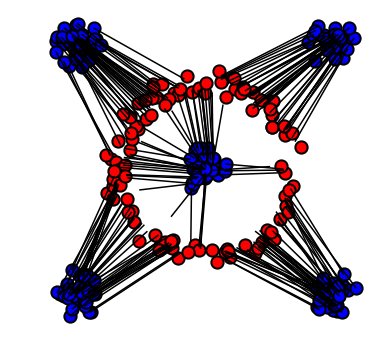

In [73]:
plt.figure(figsize=(6,6))
plotp(x, 'b')
plotp(y, 'r')
for i in range(n):
    plt.plot([x[0,i], x[0,i]-G[0,i]], [x[1,i], x[1,i]-G[1,i]], 'k')
plt.axis("off");

Set the descent step size.

In [74]:
tau = .1

Update the point cloud.

In [75]:
z = z - tau * G

__Exercise 3__

Implement the gradient flow.

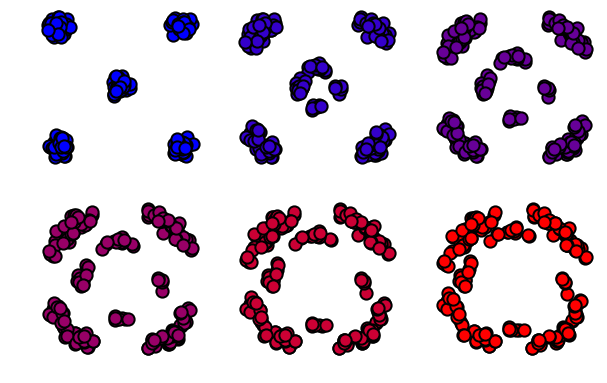

In [76]:
# Gradient flow with epsilon = 0.001 and 70 iterations

plt.figure(figsize = (10,10))

z = x;
tau = .03;
giter = 70;
ndisp, kdisp = np.round(np.linspace(0,giter-1,6)), 0

f = np.zeros(n)
for j in range(giter):
    # Displaying flow
    if ndisp[kdisp]==j:        
        plt.subplot(3,3,kdisp+1)
        s = j/(giter-1)
        col = np.array([s,0,1-s])[None,:]
        plotp(z, col )
        plt.axis("off")
        kdisp = kdisp+1
        
    # Sinkhorn
    P = Sinkhorn(distmat(z,y), 0.001, f, 300, display_error = False)
    
    # Compute gradient
    G = z - ( y.dot(P.T) ) / a.T
    z = z - tau * G;

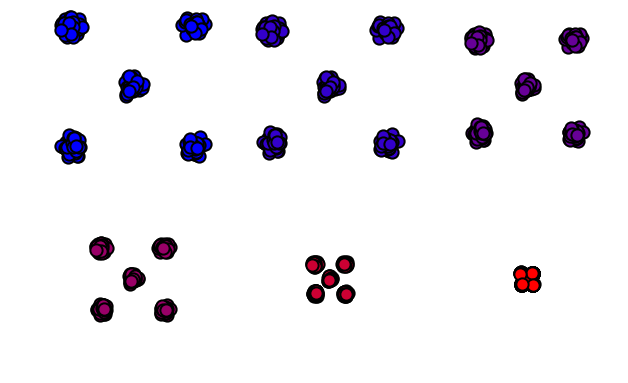

In [77]:
# Gradient flow with epsilon = 10 and 200 iterations

plt.figure(figsize = (10,10))

z = x; 
tau = .03;  
giter = 200; 
ndisp, kdisp = np.round(np.linspace(0,giter-1,6)), 0

f = np.zeros(n) # use warm restart in the following
for j in range(giter):
    # Displaying flow
    if ndisp[kdisp]==j:        
        plt.subplot(3, 3, kdisp + 1)
        s = j/(giter-1)
        col = np.array([s,0,1 - s])[None,:]
        plotp(z, col )
        plt.axis("off")
        kdisp = kdisp+1
    # Sinkhorn
    P = Sinkhorn(distmat(z, y), 10, f, 150, display_error = False)
    
    # Compute gradient
    G = z - (y.dot(P.T)) / a.T
    z = z - tau * G;

__Exercise 4__

Show the evolution of the fit as $\epsilon$ increases. What do you observe.
Replace the Sinkhorn score $W_\epsilon(\al,\be)$ by the Sinkhorn divergence
$W_\epsilon(\al,\be)-W_\epsilon(\al,\al)/2-W_\epsilon(\be,\be)/2$.

Step  0
Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12
Step  13
Step  14
Step  15
Step  16
Step  17
Step  18
Step  19
Step  20
Step  21
Step  22
Step  23
Step  24
Step  25
Step  26
Step  27
Step  28
Step  29
Step  30
Step  31
Step  32
Step  33
Step  34
Step  35
Step  36
Step  37
Step  38
Step  39
Step  40
Step  41
Step  42
Step  43
Step  44
Step  45
Step  46
Step  47
Step  48
Step  49
Step  50
Step  51
Step  52
Step  53
Step  54
Step  55
Step  56
Step  57
Step  58
Step  59
Step  60
Step  61
Step  62
Step  63
Step  64
Step  65
Step  66
Step  67
Step  68
Step  69


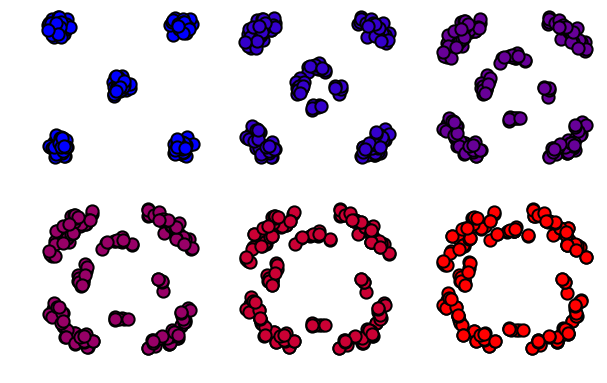

In [79]:
plt.figure(figsize = (10,10))


z = x; 
tau = .03;  
giter = 70; 
ndisp, kdisp = np.round(np.linspace(0,giter-1,6)), 0

f = np.zeros(n) 
for j in range(giter):
    print("Step ", j)
    if ndisp[kdisp]==j:        
        plt.subplot(3,3,kdisp+1)
        s = j/(giter-1)
        col = np.array([s,0,1-s])[None,:]
        plotp(z, col )
        plt.axis("off")
        kdisp = kdisp + 1
    # Sinkhorn
    b = np.ones((1,m))/m
    P = Sinkhorn(distmat(z,y), 0.001, f, 300, display_error = False)
    b = np.ones((n,1))/1
    P_ = Sinkhorn(distmat(z,z), 0.001, f, 300, display_error = False)
    # Compute the gradient
    G = z - (y.dot(P.T)) / a.T 
    
    # ADDED
    for i in range(n):
        tmp = 0
        for j in range(n):
            tmp += (P_[i,j] + P_[j,i])*(z[:, i] - z[:, j])
        G[:, i] += 1/(2*a[i]) * tmp
    
    z = z - tau * G;

Step  0
Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12
Step  13
Step  14
Step  15
Step  16
Step  17
Step  18
Step  19
Step  20
Step  21
Step  22
Step  23
Step  24
Step  25
Step  26
Step  27
Step  28
Step  29
Step  30
Step  31
Step  32
Step  33
Step  34
Step  35
Step  36
Step  37
Step  38
Step  39
Step  40
Step  41
Step  42
Step  43
Step  44
Step  45
Step  46
Step  47
Step  48
Step  49
Step  50
Step  51
Step  52
Step  53
Step  54
Step  55
Step  56
Step  57
Step  58
Step  59
Step  60
Step  61
Step  62
Step  63
Step  64
Step  65
Step  66
Step  67
Step  68
Step  69


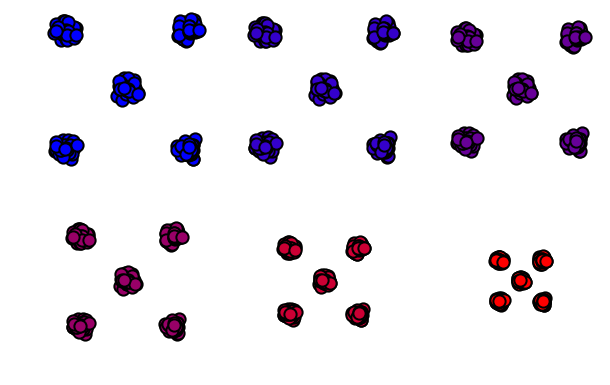

In [80]:
plt.figure(figsize = (10,10))


theta = np.random.uniform(0, 2*np.pi, n)
r = np.random.uniform(0, .2 , n)
t = np.tile(np.array([[0,0], [1, 1], [-1, 1], [1, -1], [-1, -1]]), (n // 5, 1))
x = t.T + r*np.array([np.cos(theta), np.sin(theta)])

theta = np.random.uniform(0,2*np.pi, m)
r = np.random.uniform(.6, .8, m)
y = r*np.array([np.cos(theta), np.sin(theta)])

z = x; 
tau = .03;  
giter = 70; 
ndisp, kdisp = np.round(np.linspace(0,giter-1,6)), 0

f = np.zeros(n) 
for j in range(giter):
    print("Step ", j)
    if ndisp[kdisp]==j:        
        plt.subplot(3,3,kdisp+1)
        s = j/(giter-1)
        col = np.array([s,0,1-s])[None,:]
        plotp(z, col )
        plt.axis("off")
        kdisp = kdisp + 1
    # Sinkhorn
    b = tmp_b
    P = Sinkhorn(distmat(z,y), 10, f, 150, display_error = False)
    b = a
    P_ = Sinkhorn(distmat(z,z), 10, f, 150, display_error = False)
    # Compute the gradient
    G = z - (y.dot(P.T)) / a.T 
    
    # ADDED
    for i in range(n):
        tmp = 0
        for j in range(n):
            tmp += (P_[i,j] + P_[j,i])*(z[:, i] - z[:, j])
        G[:, i] += 1/(2*a[i]) * tmp
    
    z = z - tau * G;

Generative Model Fitting
------------------------
The Wasserstein is a non-parametric idealization which does not
corresponds to any practical application. We consider here a simple toy
example of density fitting, where the goal is to find a parameter $\theta$
to fit a deformed point cloud of the form $ (g_\theta(x_i))_i $ using a
Sinkhorn cost. This is ofen called a generative model in the machine
learning litterature, and corresponds to the problem of shape
registration in imaging.


The matching is achieved by solving
$$ \min_\th \Ff(\th) \eqdef \Ee(G_\th(z)) =  W_\epsilon\pa{ \frac{1}{n}\sum_i \de_{g_\th(z_i)}, \frac{1}{m}\sum_i \de_{y_i} },  $$
where the function $G_\th(z)=( g_\th(z_i) )_i$ operates independently on
each point.


The gradient reads
$$ \nabla \Ff(\th) = \sum_i \partial g_\th(z_i)^*[ \nabla \Ee(G_\th(z))_i ], $$
where $\partial g_\th(z_i)^*$ is the adjoint of the Jacobian of
$g_\th$.


We consider here a simple model of affine transformation, where
$\th=(A,h) \in \RR^{d \times d} \times \RR^d $
and $g_\th(z_i)=Az_i+h$.


Denoting $ v_i = \nabla \Ee(G_\th(z))_i $ the gradient of the Sinkhorn
loss (which is computed as in the previous section), the gradient with
respect to the parameter reads
$$ \nabla_A \Ff(\th) = \sum_i  v_i z_i^\top
  \qandq \nabla_h \Ff(\th) = \sum_i  v_i. $$


Generate the data.

In [219]:
n = 20
m = 30
a = np.ones((n,1))/n
b = np.ones((1,m))/m

In [220]:
z = np.random.randn(2,n)*.2
y = np.random.randn(2,m)*.2
y[0,:] = y[0,:]*.05 + 1

Initialize the parameters.

In [221]:
A = np.eye(2)
h = np.zeros(2)

Display the clouds.

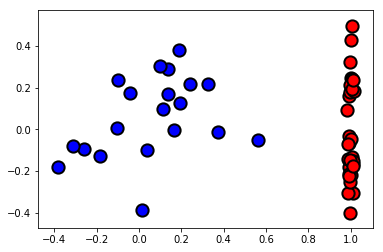

In [222]:
plotp(A.dot(z)+h[:,None], 'b')
plotp(y, 'r')
#plt.xlim(-.7,1.1)
#plt.ylim(-.7,.7);

Run Sinkhorn.

In [112]:
x = A.dot(z)+h[:,None]
f = np.zeros(n)
(P,Err) = Sinkhorn(distmat(x,y), 0.001, f, 500, display_error = True)

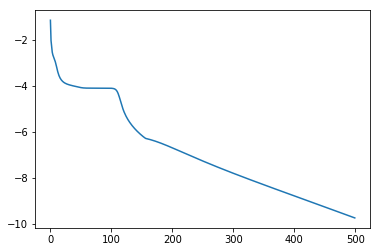

In [113]:
plt.plot(np.log(Err))

Compute gradient with respect to positions.

In [114]:
v = a.transpose() * x - y.dot(P.transpose())

gradient with respect to parameters

In [115]:
nabla_A = v.dot(z.transpose())
nabla_h = np.sum(v,1)

__Exercise 5__

Implement the gradient descent.

Step :  0
Step :  1
Step :  2
Step :  3
Step :  4
Step :  5
Step :  6
Step :  7
Step :  8
Step :  9
Step :  10
Step :  11
Step :  12
Step :  13
Step :  14
Step :  15
Step :  16
Step :  17
Step :  18
Step :  19
Step :  20
Step :  21
Step :  22
Step :  23
Step :  24
Step :  25
Step :  26
Step :  27
Step :  28
Step :  29
Step :  30
Step :  31
Step :  32
Step :  33
Step :  34
Step :  35
Step :  36
Step :  37
Step :  38
Step :  39


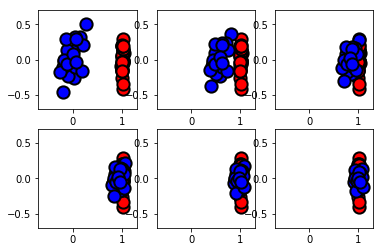

In [116]:
A = np.eye(2)
h = np.zeros(2)
# step size for the descent
tau_A = .8
tau_h = .1
# #iter for the gradient descent
giter = 40 
ndisp = np.round( np.linspace(0,giter-1,6) )
kdisp = 0
f = np.zeros(n)
for j in range(giter):
    print('Step : ', j)
    x = A.dot(z)+h[:,None] 
    if ndisp[kdisp]==j:
        plt.subplot(2,3,kdisp+1)
        plotp(y, 'r')
        plotp(x, 'b')
        kdisp = kdisp+1
        plt.xlim(-.7,1.3)
        plt.ylim(-.7,.7)
    P = Sinkhorn(distmat(x,y), epsilon,f,300, display_error = False)
    v = a.transpose() * x - y.dot(P.transpose())
    nabla_A = v.dot(z.transpose())
    nabla_h = np.sum(v,1)
    A = A - tau_A * nabla_A
    h = h - tau_h * nabla_h   

In [158]:
n = 100
m = 100
a = np.ones((n,1))/n
b = np.ones((1,m))/m



In [170]:
theta = np.random.uniform(0, 2*np.pi, n)
r = np.random.uniform(3,4, n)
z_2d = r*np.array([np.cos(theta), np.sin(theta)])
z = np.array([z_2d[0, i] + 1j * z_2d[1,i] for i in range(n)])

u1, u2, d1, d2 = 8 + 4j, 10, np.exp(1j*np.pi/13), 1
y = (u1 * z + u2)/(d1 * z + d2)
y_2d = np.array([np.real(y), np.imag(y)])

(-4.697298404809731, 10.276811361944187, -4.168276229591248, 4.231184809941352)

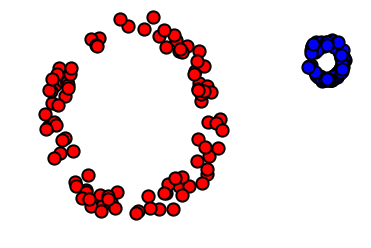

In [171]:
plotp(z_2d, 'r')
plotp(y_2d, 'b')
plt.axis("off")

Step :  0


TypeError: 'str' object is not callable

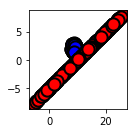

In [216]:
tau = lambda t : 5/(1 + t)
epsilon = 0.01
niter = 300
giter = 80
ndisp, kdisp = np.round(np.linspace(0,giter-1,6)), 0

u1, u2, d1, d2 = 8 + 4j, 10, 0, 1
f = np.zeros(n)

for j in range(giter):
    print('Step : ', j)
    
    x = (u1 * z + u2)/(d1 * z + d2)
    x_2d = np.array([np.real(x), np.imag(x)])
    
    if ndisp[kdisp]==j:
        plt.subplot(2,3,kdisp+1)
        plotp(y_2d, 'b')
        plotp(x_2d, 'r')
        plt.axis("off")
        kdisp = kdisp + 1
        
    P = Sinkhorn(distmat(x_2d, y_2d), epsilon, f, niter, display_error = False)
    v = a.transpose() * x_2d - y_2d.dot(P.transpose())
    v = np.array([v[0,i] + 1j*v[1, i] for i in range(n)])
    nabla_u1 = (np.conj(z/(d1*z + d2))).dot(v)
    nabla_u2 = (np.conj(1/(d1*z + d2))).dot(v)
    nabla_d1 = (np.conj(-z*(u1*z + u2)/((d1*z + d2)**2))).dot(v)
    nabla_d2 = (np.conj(-(u1*z + u2)/((d1*z + d2)**2))).dot(v)
    #u1 = u1 - tau(j)*nabla_u1
    #u2 = u2 - tau(j)*nabla_u2
    d1 = d1 - tau(j)*nabla_d1
    #d2 = d2 - tau(j)*nabla_d2

In [185]:
u2

(6.620281927998303+1.4786820197153037j)

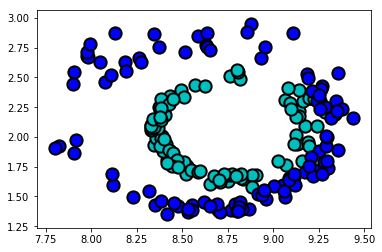

In [187]:
plotp(x_2d, "c")
plotp(y_2d, 'b')

In [2]:
n = 100
m = 100
a = np.ones((n,1))/n
b = np.ones((1,m))/m

In [3]:
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=150, edgecolors="k", c=col, linewidths=2)

def mina_u(H,epsilon): return -epsilon*np.log( np.sum(a * np.exp(-H/epsilon),0) )
def minb_u(H,epsilon): return -epsilon*np.log( np.sum(b * np.exp(-H/epsilon),1) )

def mina(H,epsilon): return mina_u(H-np.min(H,0),epsilon) + np.min(H,0);
def minb(H,epsilon): return minb_u(H-np.min(H,1)[:,None],epsilon) + np.min(H,1);

def Sinkhorn(C, epsilon, f, niter = 500, display_error = False):    
    Err = np.zeros(niter)
    for it in range(niter):
        g = mina(C - f[:,None], epsilon)
        f = minb(C - g[None,:], epsilon)
        if display_error:
            P = a * np.exp((f[:,None]+ g[None,:] - C)/epsilon) * b
            Err[it] = np.linalg.norm(np.sum(P,0)-b,1)
        
    P = a * np.exp((f[:,None]+ g[None,:] - C)/epsilon) * b
    if display_error: 
        return (P, Err)
    else:
        return P
    
def distmat(x,y):
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)

(-2.935420906188654,
 18.446789865459376,
 -4.210849713407294,
 2.2445053521646283)

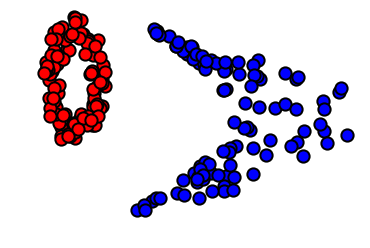

In [4]:

theta = np.random.uniform(0, 2*np.pi, n)
r = np.random.uniform(1,2,n)
z = r*np.array([np.cos(theta), np.sin(theta)])

#alpha = 1j + 0.5
#beta = 6 + 2j
a00 = 10
a10 = -1
a01 = -1
a11 = 3

b00 = -1
b10 = 1
b01 = -1
b11 = 0
def transf(x):
    x_ = a00 + a10*x[0] + a01*x[1] + a11*x[0]*x[1]
    y_ = b00 + b10*x[0] + b01*x[1] + b11*x[0]*x[1]
    return np.array([x_, y_])

y = np.array([transf([z[0, i], z[1,i]]) for i in range(n)])
y = y.T

plotp(z, 'r')
plotp(y, 'b')
plt.axis('off')


Step : 0
Step : 1
Step : 2
Step : 3
Step : 4
Step : 5
Step : 6
Step : 7
Step : 8
Step : 9
Step : 10
Step : 11
Step : 12
Step : 13
Step : 14
Step : 15
Step : 16
Step : 17
Step : 18
Step : 19
Step : 20
Step : 21
Step : 22
Step : 23
Step : 24
Step : 25
Step : 26
Step : 27
Step : 28
Step : 29


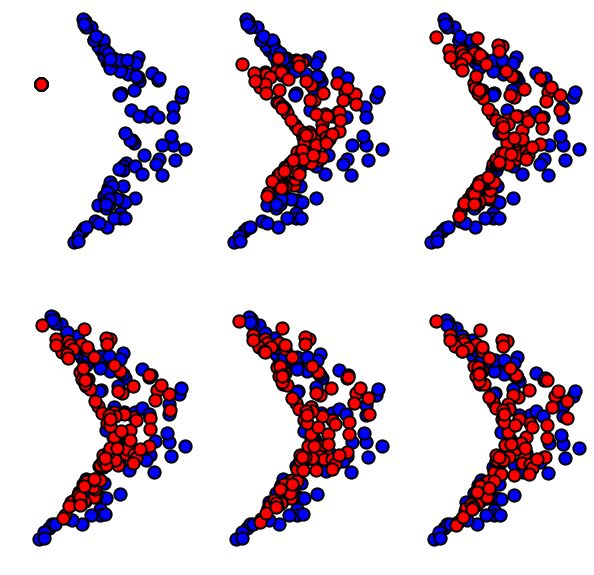

In [11]:
a00 = 0
a10 = 0
a01 = 0
a11 = 0

b00 = 0
b10 = 0
b01 = 0
b11 = 0

epsilon = 0.01
niter = 300
tau = lambda t : 1/(1 + t)

giter = 30
ndisp, kdisp = np.round( np.linspace(0,giter-1,6) ), 0

f = np.zeros(n)
plt.figure(figsize = (10,10))
for j in range(giter):
    print("Step :", j)
    x = np.array([transf([z[0, i], z[1, i]]) for i in range(n)])
    x = x.T
    
    if ndisp[kdisp] == j:
        plt.subplot(2,3,kdisp + 1)
        plotp(y, 'b')
        plotp(x, 'r')
        plt.axis("off")
        kdisp = kdisp + 1

    
    P = Sinkhorn(distmat(x, y), epsilon, f, niter, display_error = False)
    v = a.transpose() * x - y.dot(P.transpose())
    n_a00 = np.sum(v[0, :])
    n_b00 = np.sum(v[1, :])
    n_a10 = np.dot(z[0,:], v[0,:])
    n_b10 = np.dot(z[0,:], v[1,:])
    n_a01 = np.dot(z[1,:], v[0,:])
    n_b01 = np.dot(z[1,:], v[1,:])
    n_a11 = np.dot(z[0, :] * z[1, :], v[0, :])
    n_b11 = np.dot(z[0, :] * z[1, :], v[1, :])
    
    a00 = a00 - tau(j)*n_a00
    b00 = b00 - tau(j)*n_b00
    a10 = a10 - tau(j)*n_a10
    a01 = a01 - tau(j)*n_a01
    b10 = b10 - tau(j)*n_b10
    b01 = b01 - tau(j)*n_b01
    a11 = a11 - tau(j)*n_a11
    b11 = b11 - tau(j)*n_b11



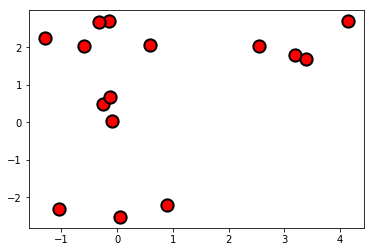

In [195]:
plotp(x, "r")t

In [83]:
a

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [82]:
np.dot(x[1,:], v[0,:])

nan